In [1]:
import os
import numpy as np # linear algebra
import pandas as pd # data processing

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
url = 'https://raw.githubusercontent.com/nirajpahari/rain_prediction/master/dataset/weatherAUS.csv'

In [4]:
input_df = pd.read_csv(url)

In [5]:
input_df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [6]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

## Making column header lowercase

In [7]:
input_df.columns = map(str.lower, input_df.columns)

Checking the summary of the dataset

In [8]:
input_df.describe()

,mintemp,maxtemp,rainfall,evaporation,sunshine,windgustspeed,windspeed9am,windspeed3pm,humidity9am,humidity3pm,pressure9am,pressure3pm,cloud9am,cloud3pm,temp9am,temp3pm,risk_mm
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


Using matplotlib to plot a histogram for each numerical attribute

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f05e5029ed0>,
      dtype=object)

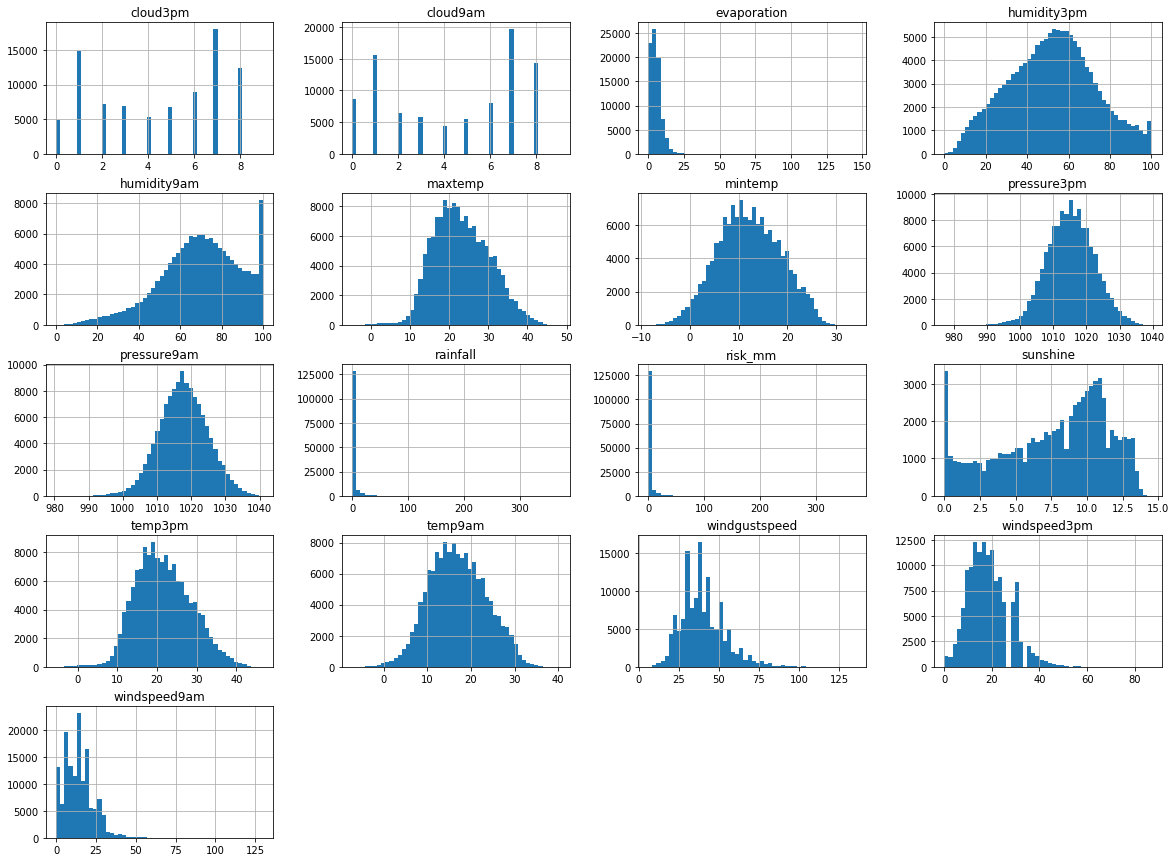

In [ ]:
input_df.hist(bins=50, figsize=(20,15))

Points noted till now:
- rainfall, evaporation, windgustspeed, windspped9am, windspeed3pm, riskmm are tail heavy so need to be transformed to have more bell shaped distributions
- The attributes have different scales -> feature scaling

Now lets look at all the data that are of type object just to get the understanding.

In [ ]:
input_df["location"].value_counts()

Canberra            3418
Sydney              3337
Perth               3193
Darwin              3192
Hobart              3188
Brisbane            3161
Adelaide            3090
Bendigo             3034
Townsville          3033
AliceSprings        3031
MountGambier        3030
Ballarat            3028
Launceston          3028
Albany              3016
Albury              3011
MelbourneAirport    3009
PerthAirport        3009
Mildura             3007
SydneyAirport       3005
Nuriootpa           3002
Sale                3000
Watsonia            2999
Tuggeranong         2998
Portland            2996
Woomera             2990
Cairns              2988
Cobar               2988
Wollongong          2983
GoldCoast           2980
WaggaWagga          2976
Penrith             2964
NorfolkIsland       2964
SalmonGums          2955
Newcastle           2955
CoffsHarbour        2953
Witchcliffe         2952
Richmond            2951
Dartmoor            2943
NorahHead           2929
BadgerysCreek       2928


In [ ]:
input_df['windgustdir'].value_counts()

In [ ]:
input_df['winddir9am'].value_counts()

In [ ]:
input_df['winddir3pm'].value_counts()

In [ ]:
input_df['raintoday'].value_counts()

In [ ]:
input_df['raintomorrow'].value_counts()

In this problem we are going to predict the feature raintomorrow.
We can clearly see that this dataset is not balanced.
Lets plot the graph too to see the imbalance nature of the dataset.

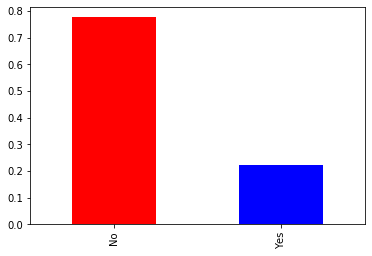

In [ ]:
input_df.raintomorrow.value_counts(normalize=True).plot(kind='bar', color=['red', 'blue'])

## Train Test split
Lets convert our target column raintomorrow and another column raintoday from yes, no to 1, 0

In [9]:
input_df['raintoday'] = input_df['raintoday'].map({"Yes":1, "No": 0})
input_df['raintomorrow'] = input_df['raintomorrow'].map({"Yes":1, "No": 0})

Lets split the data set to train and test set before we handle the imbalance dataset.
We will prepare X Y data first.
Since we are going to predict whether it is going to rain or not tomorrow, we set raintomorrow as Y and everything else as X


In [12]:
input_df.raintomorrow.value_counts()

0    110316
1     31877
Name: raintomorrow, dtype: int64

In [15]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for train_index, test_index in split.split(input_df, input_df['raintomorrow']):
    strat_train_set = input_df.loc[train_index]
    strat_test_set = input_df.loc[test_index]
    

In [16]:
print(strat_train_set.raintomorrow.value_counts())
print(strat_train_set.raintomorrow.value_counts()/len(strat_train_set))
print("-----------------------")
print(strat_test_set.raintomorrow.value_counts()/len(strat_test_set))
print(strat_test_set.raintomorrow.value_counts())

0    88252
1    25502
Name: raintomorrow, dtype: int64
0    0.775814
1    0.224186
Name: raintomorrow, dtype: float64
-----------------------
0    0.775836
1    0.224164
Name: raintomorrow, dtype: float64
0    22064
1     6375
Name: raintomorrow, dtype: int64


We want to handle the imbalanced dataset here:
According to this [link](https://www.kdnuggets.com/2020/01/5-most-useful-techniques-handle-imbalanced-datasets.html),
4 most useful techniques are:
- random undersampling and oversampling
- undersampling and oversampling using imbalanced learn
- class weights in the models
- changing teh evaluation metric

And according to this [link](https://elitedatascience.com/imbalanced-classes)
- upsample minority class
- down sample majority class
- change the performance metric
- penalize algorithms
- use tree based algorithms

And according to this website [machinelearningmastery](https://machinelearningmastery.com/tactics-to-combat-imbalanced-classes-in-your-machine-learning-dataset/), the author provides 8 tactics to combat imbalanced training data
1. Collect more data if possible
2. Try changing Performance Metric
   > Confusion Matrix
   > Precision
   > Recall
   > F1 Score (or F-score)
   Further advice to look at:
   > Kappa(or Cohen's kappa)
   > ROC Curves
3. Try resampling the dataset
4. Try generate synthetic samples
5. Try different Algorithms
    > decision trees often perform well on imbalanced datasets
6. Try Penalized Models
7. Try Different Perspective
    > anomaly detection and change detection

Since there are multiple methods we use few methods among them and evaluate the models

## Test1: Upsampling minority class

In [19]:
from sklearn.utils import resample

In [20]:
df_majority = strat_train_set[strat_train_set.raintomorrow==0]

Upsample

In [21]:
df_minority_upsampled = resample(df_minority, replace=True, n_samples=88252, random_state=42)

df_upsampled = pd.concat([df_majority, df_minority_upsampled])

df_upsampled.raintomorrow.value_counts()

1    88252
0    88252
Name: raintomorrow, dtype: int64

## Checking Correlation

In [24]:
corr_matrix_up = df_upsampled.corr()

In [25]:
corr_matrix_up['raintomorrow'].sort_values(ascending=False)

raintomorrow     1.000000
humidity3pm      0.510631
cloud3pm         0.465996
risk_mm          0.417748
cloud9am         0.389684
raintoday        0.340510
humidity9am      0.316783
windgustspeed    0.261385
rainfall         0.218227
windspeed9am     0.110441
mintemp          0.101771
windspeed3pm     0.101164
temp9am         -0.030197
evaporation     -0.155123
maxtemp         -0.191586
temp3pm         -0.231497
pressure3pm     -0.263483
pressure9am     -0.287344
sunshine        -0.517150
Name: raintomorrow, dtype: float64

## Preparing the data for ML Algorithms

we will create X and y data for input features and output feature respectively for each sampled data

In [26]:
up_X = df_upsampled.drop("raintomorrow", axis=1)
up_y = df_upsampled["raintomorrow"].copy()

test_X = strat_test_set.drop("raintomorrow", axis=1)
test_y = strat_test_set["raintomorrow"].copy()


## Data Cleaning
we will use SimpleImputer from scikit-learn to replace each attribute's missing values with the median of that attribute

In [27]:
from sklearn.impute import SimpleImputer

imputer_up = SimpleImputer(strategy="mean")

Since mean can only be computed on numerical attributes, we need to create a copy of data without object type.

In [28]:
up_X_num = up_X.drop(["date", "location", "windgustdir", "winddir9am", "winddir3pm", "raintoday"], axis=1)

up_X_cat = up_X[["date", "location", "windgustdir", "winddir9am", "winddir3pm", "raintoday"]].copy()


Now we will fit the imputer instance to both the upsampled and downsampled data

In [29]:
imputer_up.fit(up_X_num)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='mean', verbose=0)

In [30]:
print(up_X_num.median().values)

[  12.2    21.8     0.      4.4     6.8    39.     13.     19.     74.
   58.   1016.5  1014.2     6.      6.     16.5    20.1     1.05]


Now we will use the trained imputer to transform the training set by replacing missing values with the learned medians

In [31]:
X_num_temp_up = imputer_up.transform(up_X_num)

Since the results are plain Numpy array, we will create DF for the transformed data.


In [32]:
up_X_num_tr = pd.DataFrame(X_num_temp_up, columns=up_X_num.columns, index=up_X_num.index)

In [33]:
up_X_num_tr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 176504 entries, 101064 to 123940
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   mintemp        176504 non-null  float64
 1   maxtemp        176504 non-null  float64
 2   rainfall       176504 non-null  float64
 3   evaporation    176504 non-null  float64
 4   sunshine       176504 non-null  float64
 5   windgustspeed  176504 non-null  float64
 6   windspeed9am   176504 non-null  float64
 7   windspeed3pm   176504 non-null  float64
 8   humidity9am    176504 non-null  float64
 9   humidity3pm    176504 non-null  float64
 10  pressure9am    176504 non-null  float64
 11  pressure3pm    176504 non-null  float64
 12  cloud9am       176504 non-null  float64
 13  cloud3pm       176504 non-null  float64
 14  temp9am        176504 non-null  float64
 15  temp3pm        176504 non-null  float64
 16  risk_mm        176504 non-null  float64
dtypes: float64(17)
memory us

## Feature Scaling
According to the book (Hands on machine learning with scikit-learn, keras and tensorflow) there are two common ways to get all attribues to have the same scale: 
i) min-max scaling
ii) standardization

since min max scaling is more affected by outliers we will use standardization here.
We will use StandardScaler provided by scikit-learn


In [34]:
from sklearn.preprocessing import StandardScaler

In [35]:
feat_scal_transformer = StandardScaler()

temp1 = feat_scal_transformer.fit_transform(up_X_num_tr)

In [36]:
temp1

array([[ 1.06004776e+00,  1.73518587e+00, -3.33980614e-01, ...,
         1.15401676e+00,  1.86451797e+00, -4.23896472e-01],
       [-5.56965356e-16,  0.00000000e+00, -3.15966799e-01, ...,
         0.00000000e+00,  5.17239912e-16, -4.23896472e-01],
       [ 7.23853485e-02,  1.31134151e-01, -3.33980614e-01, ...,
        -7.40429872e-02,  3.35822005e-01, -4.23896472e-01],
       ...,
       [ 5.89732324e-01, -2.36427694e-02,  1.16364772e-01, ...,
         3.47724336e-02,  1.75672904e-01,  9.00770499e-01],
       [-1.66778175e+00, -7.97527373e-01, -3.15966799e-01, ...,
        -1.98608538e+00, -6.54190621e-01, -1.29526034e-01],
       [ 4.64314875e-01, -3.05055352e-01, -3.33980614e-01, ...,
         2.21313155e-01, -6.54190621e-01, -2.93065166e-01]])

## Handling missing values in categorical attributes

According to this [Link](https://medium.com/analytics-vidhya/ways-to-handle-categorical-column-missing-data-its-implementations-15dc4a56893), there are 3 ways to handle categorical data:
1. Frequent Categorical Imputation
> Here NaN values are replaced with the most frequent occured category in the column.
2. Adding a variable to capture NaN
> Here NaN is again replaced by most occuring value and a new feature added to introduce some weight to non imputed and imputed observations
3. Create a New Category for NaN Values
> here a new category is created for NaN values and added to all NaN values


Lets check the amount of NaN values to decide which method to use.

In [37]:
up_X_cat.isnull().sum()

date               0
location           0
windgustdir    12278
winddir9am     11754
winddir3pm      5167
raintoday       2398
dtype: int64

In [38]:
list(up_X_cat.columns)

['date', 'location', 'windgustdir', 'winddir9am', 'winddir3pm', 'raintoday']

Since we have 176504 total data and a column with highest NaN value is 12278 ie around 6% so we use the third method ie we will add unknown as the value for all NaN values.

In [40]:
from sklearn.impute import SimpleImputer

add_unknown_imputer = SimpleImputer(strategy="constant", fill_value="Unknown")


In [42]:
temp = add_unknown_imputer.fit_transform(up_X_cat)

In [43]:
temp

array([['2012-01-25', 'Nuriootpa', 'SE', 'ESE', 'SSE', 0.0],
       ['2010-08-06', 'NorahHead', 'S', 'W', 'S', 0.0],
       ['2016-11-30', 'Adelaide', 'WSW', 'NW', 'SW', 0.0],
       ...,
       ['2016-04-26', 'SalmonGums', 'W', 'NNW', 'WNW', 1.0],
       ['2011-08-14', 'Dartmoor', 'N', 'Unknown', 'NNW', 0.0],
       ['2009-03-28', 'Walpole', 'SSE', 'WSW', 'SSE', 0.0]], dtype=object)

## Transforming date to month only

In [52]:
from sklearn.base import BaseEstimator, TransformerMixin

In [53]:
class DateToMonthOnlyTransformer(BaseEstimator, TransformerMixin):
    def __init__(self):
        pass
    def fit(self, X, y=None):
        return self
    
    def get_month( self, obj ):
        return str(obj)[5:7]
    
    def transform(self, X,y=None):
        print(X)
        print("-------------------")
        X = X.apply(self.get_month)
        print(X)
        return np.array(X.values.tolist())

In [54]:
dtm_only_trans = DateToMonthOnlyTransformer()
temp_dtm_trans = dtm_only_trans.fit_transform(up_X_cat.date)

101064    2012-01-25
18241     2010-08-06
96741     2016-11-30
83246     2012-11-12
86799     2014-06-28
             ...    
88296     2010-03-02
106804    2011-03-17
123432    2016-04-26
79613     2011-08-14
123940    2009-03-28
Name: date, Length: 176504, dtype: object
-------------------
101064    01
18241     08
96741     11
83246     11
86799     06
          ..
88296     03
106804    03
123432    04
79613     08
123940    03
Name: date, Length: 176504, dtype: object


## Handling text and categorical attributes

In [44]:
up_X_cat.head(10)

,date,location,windgustdir,winddir9am,winddir3pm,raintoday
101064,2012-01-25,Nuriootpa,SE,ESE,SSE,0.0
18241,2010-08-06,NorahHead,S,W,S,0.0
96741,2016-11-30,Adelaide,WSW,NW,SW,0.0
83246,2012-11-12,Brisbane,E,SE,E,0.0
86799,2014-06-28,Cairns,NNE,E,NNE,0.0
54432,2010-12-30,Ballarat,SE,ESE,W,0.0
120949,2009-02-20,SalmonGums,SE,ENE,ENE,0.0
82485,2010-09-08,Brisbane,ESE,SW,ESE,0.0
33451,2010-09-10,SydneyAirport,WNW,NW,WSW,1.0
132972,2009-02-21,AliceSprings,E,E,SSE,0.0


Lets count the no. of categories in each columns except date and raintoday

In [55]:
print("Location: ", len(up_X_cat.location.unique()))
print("WindGustDir: ", len(up_X_cat.windgustdir.unique()))
print("WindDir9am: ", len(up_X_cat.winddir9am.unique()))
print("WindDir3pm: ", len(up_X_cat.winddir3pm.unique()))

Location:  49
WindGustDir:  17
WindDir9am:  17
WindDir3pm:  17


Lets convert the categorical data using OneHotEncoderTransform

In [46]:
from sklearn.preprocessing import OneHotEncoder

onehot_encoder = OneHotEncoder()

We will add one hot encoding process in the pipeline for only location and other direction categories too.

We try to get only the month from the date. So for this we will create an custom transformer.

## Pipelines
We are going to create the pipeline for the data cleaning step.
We will have seperate transformer for numerical data where:
* We use simple imputer with mean strategy for filling the NaN values

Another transformer will be for the categorical data where:
* We will use Simple imputer with strategy constant and fill Unknown for NaN values.
* We use OneHotEncoder for the columns with direction data.
* We use OrdinalEncoder for the location since the number of locations are too high and one hot encoder will have the vector of high dimension.
* We also use the custom transformer we created to change the date into only month.

In [56]:
up_X_cat

,date,location,windgustdir,winddir9am,winddir3pm,raintoday
101064,2012-01-25,Nuriootpa,SE,ESE,SSE,0.0
18241,2010-08-06,NorahHead,S,W,S,0.0
96741,2016-11-30,Adelaide,WSW,NW,SW,0.0
83246,2012-11-12,Brisbane,E,SE,E,0.0
86799,2014-06-28,Cairns,NNE,E,NNE,0.0
...,...,...,...,...,...,...
88296,2010-03-02,GoldCoast,SE,SE,SE,1.0
106804,2011-03-17,Albany,NaN,E,E,1.0
123432,2016-04-26,SalmonGums,W,NNW,WNW,1.0
79613,2011-08-14,Dartmoor,N,NaN,NNW,0.0


## Pipeline for numerical data

In [57]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [58]:
num_attributes = ['mintemp', 'maxtemp', 'rainfall', 'evaporation', 'sunshine',
       'windgustspeed', 'windspeed9am', 'windspeed3pm', 'humidity9am',
       'humidity3pm', 'pressure9am', 'pressure3pm', 'cloud9am', 'cloud3pm',
       'temp9am', 'temp3pm']
cat_attributes = ['windgustdir', 'winddir9am', 'winddir3pm']

In [59]:
numerical_trans = Pipeline([
    ('simple_imputer', SimpleImputer(strategy="mean")),
    ('standard_scaler', StandardScaler())],
)

## Pipeline for categorical data

In [63]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

categorical_trans = Pipeline(
    [('impute_unknown_for_nan', SimpleImputer(strategy="constant", fill_value="Unknown")),
    ('one_hot_dir', OneHotEncoder()),
    #  ('ordinal_cat', OrdinalEncoder())
    ]
)
cat_loc_trans = Pipeline([
    ('ordinal_loc', OrdinalEncoder()),]
)

# cat_date_trans = ColumnTransformer([
#     ('date_transformer', DateToMonthOnlyTransformer(), ['date'])
# ]
# )

In [64]:
full_pipeline = ColumnTransformer([
    ("num", numerical_trans, num_attributes),
    ("cat", categorical_trans, cat_attributes),
    ("loc", cat_loc_trans, ['location']),
#     ("date", DateToMonthOnlyTransformer(), 'date')
], remainder='drop')

## Train and Evaluate on the Training Set

According to [this](https://drgabrielharris.medium.com/python-how-scikit-learn-0-20-optimal-pipeline-and-best-practices-dc4dd94d2c09)

In [69]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, roc_curve, f1_score
import time

### Decision Tree

In [83]:
from sklearn.tree import DecisionTreeClassifier

In [96]:
tree = DecisionTreeClassifier(random_state=42)

pipeline_tree = Pipeline(steps=[('full', full_pipeline),
                           ('classifier', tree)])

In [100]:
params = {'classifier__criterion': ['entropy', 'gini'],
          'classifier__max_depth': [5,6,7],
          'classifier__min_samples_leaf': [4,5,6]}

classifier_gs_tree = GridSearchCV(pipeline_tree, params, scoring='accuracy', cv=5, verbose=1)

In [101]:
t0 = time.time()
classifier_gs_tree.fit(up_X, up_y)
tt_tree = time.time()-t0

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  90 out of  90 | elapsed:  3.4min finished


In [102]:
ypred = classifier_gs_tree.predict(test_X)

In [103]:
print("Time Taken: ", tt_tree)
print("Classification Report")
print(classification_report(test_y, ypred))

Time Taken:  209.73890781402588
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.75      0.83     22064
           1       0.48      0.78      0.59      6375

    accuracy                           0.76     28439
   macro avg       0.70      0.77      0.71     28439
weighted avg       0.82      0.76      0.77     28439



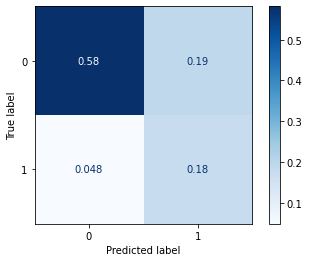

In [104]:
plot_confusion_matrix(classifier_gs_tree, test_X, test_y,cmap=plt.cm.Blues, normalize = 'all')

### Logistic Regression

In [91]:
from sklearn.linear_model import LogisticRegression

In [105]:
lr = LogisticRegression(random_state=42)

pipeline_lr = Pipeline(steps=[('full', full_pipeline),
                           ('classifier', lr)])

In [108]:
params = {'classifier__penalty': ['l1', 'l2'],
          'classifier__solver': ['liblinear']}

classifier_gs_lr = GridSearchCV(pipeline_lr, params, scoring='accuracy', cv=5, verbose=1)

In [109]:
t0 = time.time()
classifier_gs_lr.fit(up_X, up_y)
tt_lr = time.time()-t0

Fitting 5 folds for each of 2 candidates, totalling 10 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:   28.6s finished


In [114]:
ypred_lr = classifier_gs_lr.predict(test_X)

In [115]:
print("Time Taken: ", tt_tree)
print("Classification Report")
print(classification_report(test_y, ypred_lr))

Time Taken:  30.39187240600586
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22064
           1       0.52      0.77      0.62      6375

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.74     28439
weighted avg       0.83      0.79      0.80     28439



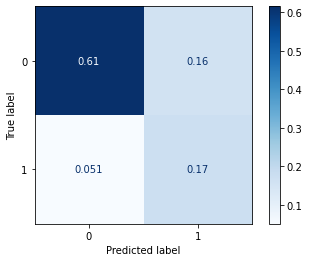

In [117]:
plot_confusion_matrix(classifier_gs_lr, test_X, test_y,cmap=plt.cm.Blues, normalize = 'all')

### Random Forest Classifier

In [118]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf = RandomForestClassifier(random_state=42)

pipeline_rf= Pipeline(steps=[('full', full_pipeline),
                           ('classifier', rf)])

In [122]:
params = {'classifier__criterion': ['gini', 'entropy'],
          'classifier__min_samples_leaf': [4,5,6],
          'classifier__max_depth': [4,5,6]}

classifier_gs_rf = GridSearchCV(pipeline_rf, params, scoring='accuracy', cv=5, verbose=1)

In [ ]:
t0 = time.time()
classifier_gs_rf.fit(up_X, up_y)
tt_rf = time.time()-t0

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
ypred_rf = classifier_gs_rf.predict(test_X)

In [ ]:
print("Time Taken: ", tt_rf)
print("Classification Report")
print(classification_report(test_y, ypred_rf))

Time Taken:  30.39187240600586
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22064
           1       0.52      0.77      0.62      6375

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.74     28439
weighted avg       0.83      0.79      0.80     28439



In [ ]:
plot_confusion_matrix(classifier_gs_rf, test_X, test_y,cmap=plt.cm.Blues, normalize = 'all')

### MLP Classifier

In [ ]:
from sklearn.neural_network import MLPClassifier

In [ ]:
mlp = MLPClassifier(random_state=42)

pipeline_mlp= Pipeline(steps=[('full', full_pipeline),
                           ('classifier', mlp)])

In [ ]:
params = {'solver': ['lbfgs'], 
          'max_iter': [1300,1400,1500,1600,1700 ], 
          'alpha': 10.0 ** -np.arange(1, 10), 
          'hidden_layer_sizes':np.arange(10, 15),}

classifier_gs_mlp = GridSearchCV(pipeline_mlp, params, scoring='accuracy', cv=5, verbose=1)

In [ ]:
t0 = time.time()
classifier_gs_mlp.fit(up_X, up_y)
tt_mlp = time.time()-t0

Fitting 5 folds for each of 18 candidates, totalling 90 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


In [ ]:
ypred_rf = classifier_gs_mlp.predict(test_X)

In [ ]:
print("Time Taken: ", tt_mlp)
print("Classification Report")
print(classification_report(test_y, ypred_mlp))

Time Taken:  30.39187240600586
Classification Report
              precision    recall  f1-score   support

           0       0.92      0.79      0.85     22064
           1       0.52      0.77      0.62      6375

    accuracy                           0.79     28439
   macro avg       0.72      0.78      0.74     28439
weighted avg       0.83      0.79      0.80     28439



In [ ]:
plot_confusion_matrix(classifier_gs_mlp, test_X, test_y,cmap=plt.cm.Blues, normalize = 'all')